In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy.stats import norm, skew #for some statistics

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv('E:\ML\Kaggle\House Prices Advanced Regression Techniques/train.csv')
test = pd.read_csv('E:\ML\Kaggle\House Prices Advanced Regression Techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#y = train["SalePrice"]
#train = train.drop(["SalePrice"], axis=1)

In [6]:
train = train.drop(['Id'],axis=1)
test_ID = test[['Id']]
test = test.drop(['Id'],axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [8]:
train[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "YrSold", "MoSold"]] = train[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "YrSold", "MoSold"]].astype(object)
test[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "YrSold", "MoSold"]] = test[["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "YrSold", "MoSold"]].astype(object)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null object
OverallCond      1459 non-null object
YearBuilt        1459 non-null object
YearRemodAdd     1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458

In [10]:
train = train.groupby(train.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
test = test.groupby(test.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [11]:
null_cols= train.columns[train.isnull().any()].tolist()
null_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
null_cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',\
             'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

In [13]:
train = train.drop(null_cols, axis = 1)
test = test.drop(null_cols, axis = 1)

In [14]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)

In [39]:
test = test.drop(test.loc[test['Electrical'].isnull()].index)

In [15]:
train.isnull().sum().max()

0

In [16]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,70.047936,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.756328,443.943797,46.581220,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.031439,9984.666267,1.383171,1.113079,30.199555,20.644343,180.610600,456.106417,161.369977,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,70.049958,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
categorical_variable = train.dtypes[train.dtypes=='object'].index.values
categorical_variable

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType',
       'SaleCondition'], dtype=object)

In [18]:
train[categorical_variable].apply(lambda x: len(x.unique()))

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [19]:
train_cont = train.drop(categorical_variable, axis=1)
cols_cont = train_cont.columns
cols_cont
cols_cont.size

37

In [20]:
train[['Street', 'LotShape', 'LandContour', 'Utilities']] = train[['Street', 'LotShape', 'LandContour', 'Utilities']].astype(object)
test[['Street', 'LotShape', 'LandContour', 'Utilities']] = test[['Street', 'LotShape', 'LandContour', 'Utilities']].astype(object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder

for var in categorical_variable:
    train[var] = le.fit_transform(train, train[var])
    #test[var] = le.fit_transform(test, test[var])

In [48]:
for var in categorical_variable:
    test[var] = le.fit_transform(test, test[var].fillna('0'))

test = test.groupby(test.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [22]:
train[categorical_variable].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,1,0,1,4,2,6,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,1,1,0,1,4,3,6,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,1,0,1,4,2,6,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,0,1,2,1,4,2,6,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,1,0,1,4,2,6,2,8,4


In [23]:
train.skew().describe()

count    65.000000
mean      2.226678
std       6.992565
min     -15.513399
25%      -0.612763
50%       0.676764
75%       2.675353
max      38.196859
dtype: float64

In [24]:
#df = pd.concat([train,y], axis=1)
#df.head()

In [25]:
cols_cont

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
cols_cont.size

37

In [27]:
df_cont = train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',\
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
             'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',\
             'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',\
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold', 'SalePrice']]
df_cont.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


<function matplotlib.pyplot.show>

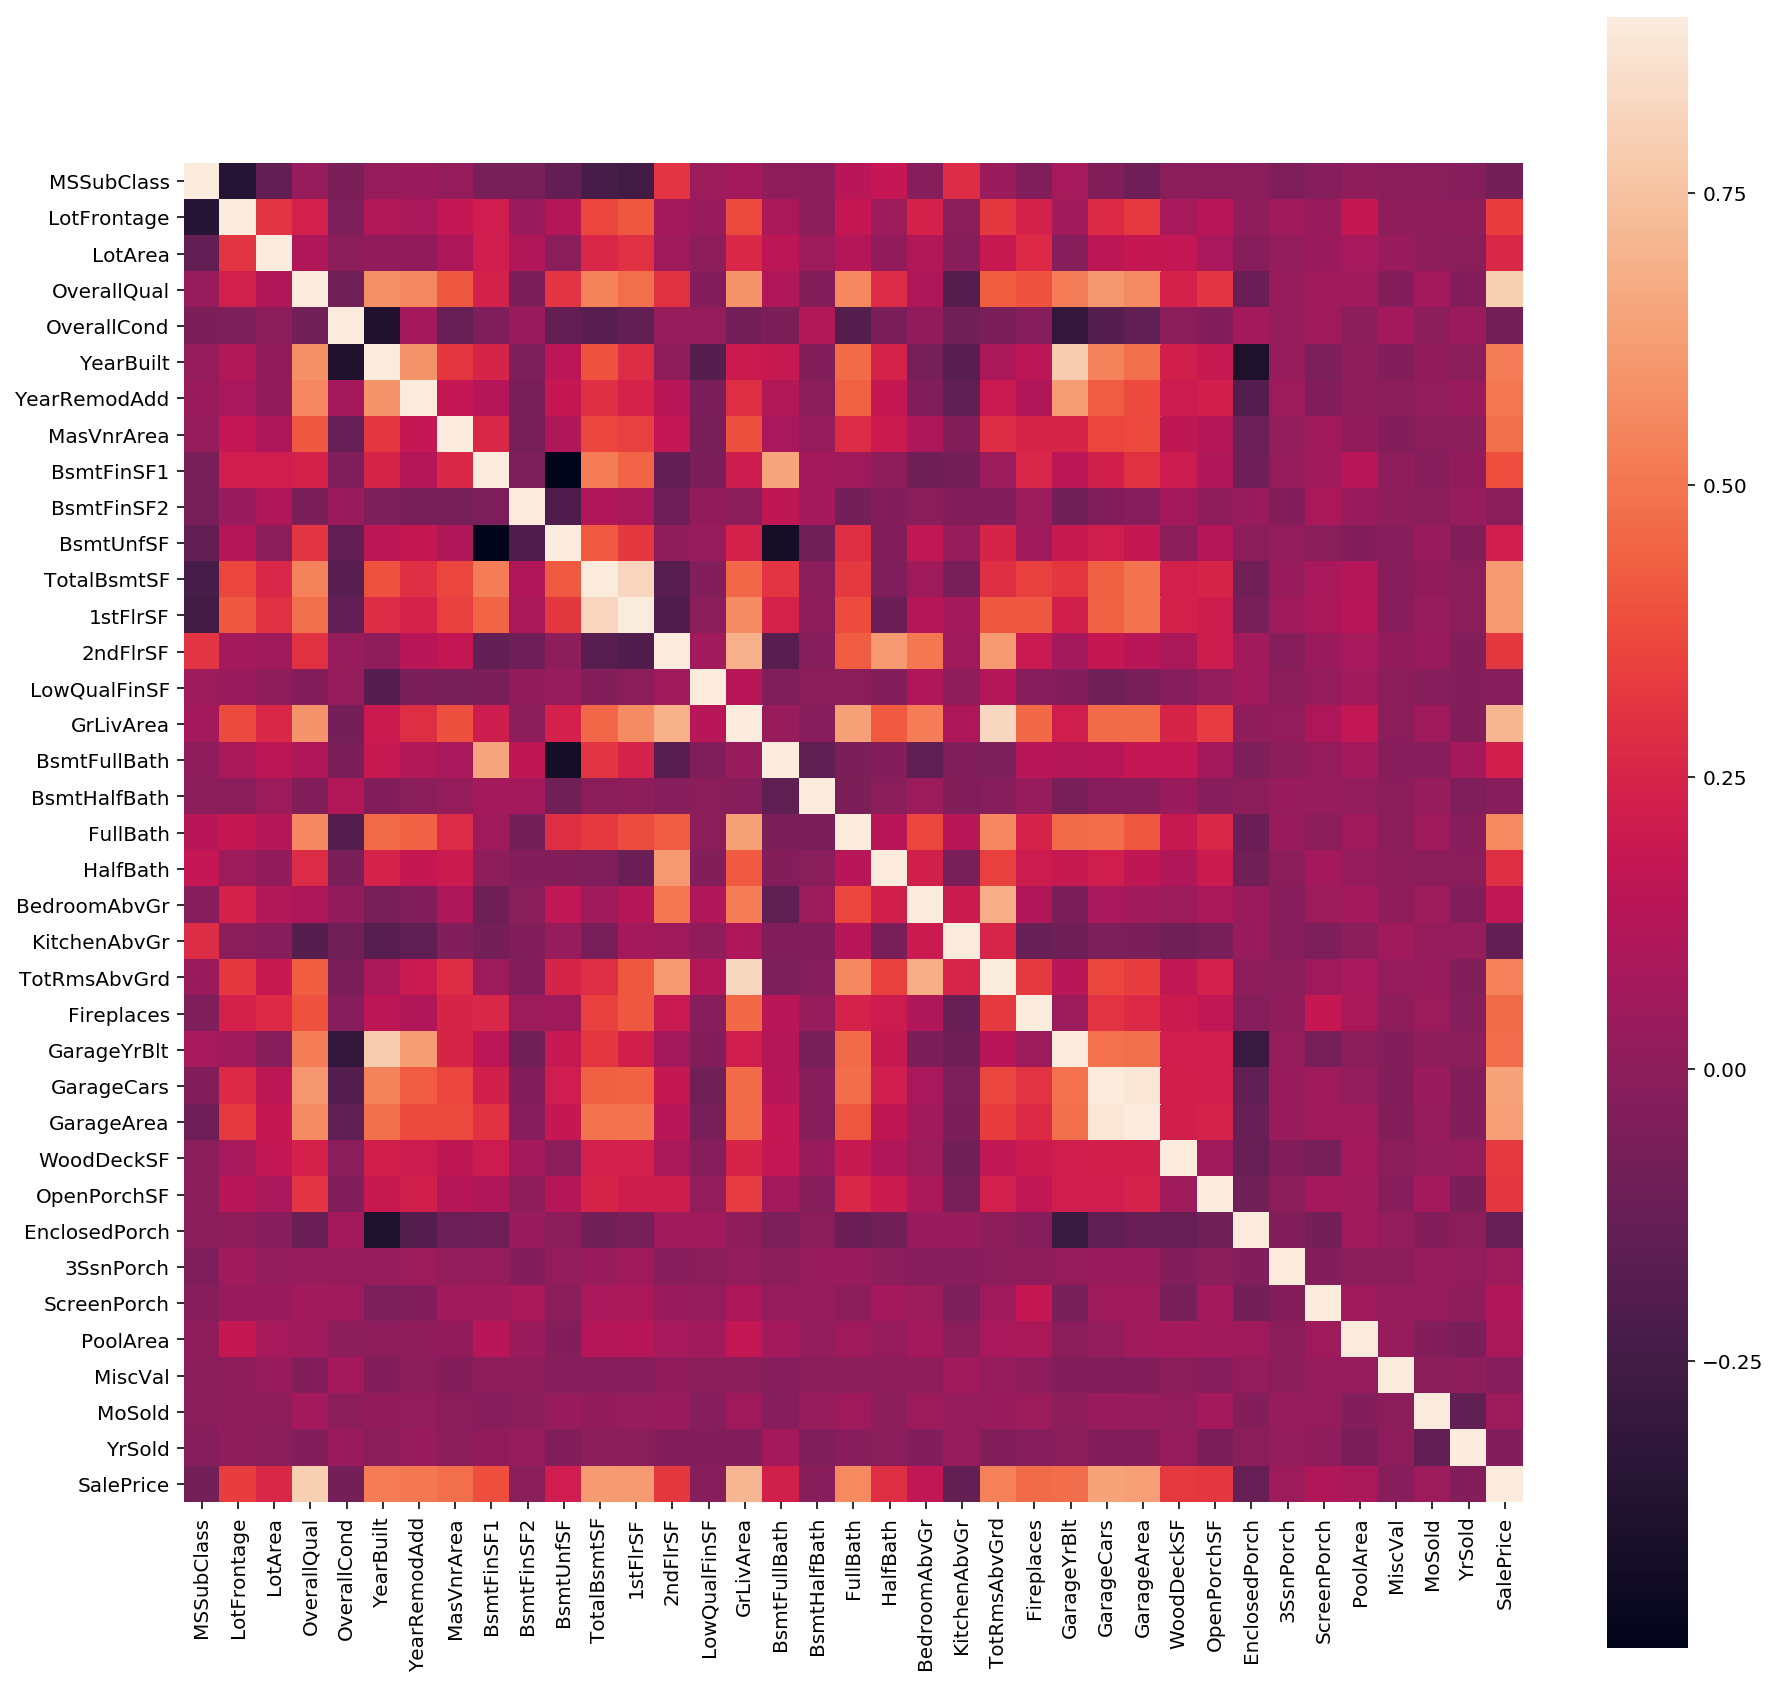

In [28]:
corrmat_cont = df_cont.corr()
cm = np.corrcoef(df_cont.values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat_cont, vmax = 0.9, square=True)
plt.show

In [29]:
print(corrmat_cont)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357145 -0.139766     0.032936    -0.059134   
LotFrontage     -0.357145     1.000000  0.306804     0.234321    -0.052778   
LotArea         -0.139766     0.306804  1.000000     0.105786    -0.005665   
OverallQual      0.032936     0.234321  0.105786     1.000000    -0.092243   
OverallCond     -0.059134    -0.052778 -0.005665    -0.092243     1.000000   
YearBuilt        0.027435     0.117546  0.014296     0.573334    -0.375780   
YearRemodAdd     0.040199     0.082680  0.013852     0.551605     0.074158   
MasVnrArea       0.023115     0.179358  0.103941     0.410060    -0.128018   
BsmtFinSF1      -0.069501     0.215989  0.214121     0.239265    -0.046595   
BsmtFinSF2      -0.065549     0.043368  0.111158    -0.059291     0.040132   
BsmtUnfSF       -0.140627     0.122202 -0.002641     0.308018    -0.137008   
TotalBsmtSF     -0.238160     0.363795  0.260962     0.537523   

In [31]:
df_cont = train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',\
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',\
             'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',\
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',\
             'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',\
             'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',\
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold']]

df_cat = train[categorical_variable]

#train = pd.concat([df_cont, df_cat], axis=1)
#train.head()

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

y = train['SalePrice']
df_train = train.drop(['SalePrice'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(df_train, y, train_size=0.8)
size = 36


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()
lr = lr.fit(X_train, y_train)


r2_score(y_val, lr.predict(X_val), sample_weight=None, multioutput='uniform_average')

0.75730850457552323

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

r2_score(y_val, forest_reg.predict(X_val), sample_weight=None, multioutput='uniform_average')

0.82692045296528249

In [54]:
test_ = pd.read_csv('E:\ML\Kaggle\House Prices Advanced Regression Techniques/test.csv')
submission = pd.DataFrame({
        "Id": test_['Id'],
        "SalePrice": forest_reg.predict(test)
    })
submission.head()

,Id,SalePrice
0,1461,125915.8
1,1462,150440.0
2,1463,176280.0
3,1464,171860.0
4,1465,181300.0


In [55]:
submission.to_csv('Kaggle house price 2.csv', index=False)

In [59]:
import sklearn
sklearn.metrics.mean_squared_error(y_val, lr.predict(X_val), sample_weight=None, multioutput='uniform_average')

1790647914.9319277

In [ ]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'SaleType',
       'SaleCondition', 'SalePrice']
size = len(cols)-1

x = cols[size]
y = cols[0:size]

for i in range(0,size):
    sns.violinplot(data = train, y=x, x=y[i])
    plt.show()
